In [1]:
import pandas as pd
from pandas import Series, DataFrame

# 1. 야구선수(타자) 데이터 불러오기

In [2]:
data = pd.read_excel('2020KBO야구.xlsx')
data

,순위,선수명,팀명,타율,경기,타석,타수,득점,안타,2루타,...,삼진,병살타,장타율,출루율+장타율,OPS,멀티히트,득점권타율,대타타율,입단년도,2020연봉
0,1,호세 페르난데스,두산,0.340,144,668,586,104,199,29,...,42,26,0.497,0.404,0.901,62,0.327,0.000,2019.0,40000.0
1,2,허경민,두산,0.332,117,487,437,70,145,25,...,28,10,0.442,0.382,0.824,45,0.375,0.000,2009.0,48000.0
2,3,오재일,두산,0.312,127,534,471,62,147,32,...,92,12,0.482,0.390,0.872,43,0.376,0.000,2005.0,47000.0
3,4,최주환,두산,0.306,140,574,509,63,156,29,...,66,7,0.473,0.366,0.839,41,0.349,0.750,2006.0,27000.0
4,5,박건우,두산,0.304,129,551,487,103,148,40,...,65,9,0.472,0.369,0.841,43,0.280,0.500,2009.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,26,김재현,SK,0.143,8,14,14,3,2,0,...,4,0,0.143,0.143,0.286,0,0.000,0.000,2006.0,5600.0
255,27,타일러 화이트,SK,0.136,9,30,22,3,3,1,...,1,0,0.318,0.367,0.685,1,0.250,0.000,NaN,NaN
256,28,채현우,SK,0.130,16,24,23,2,3,1,...,8,2,0.174,0.167,0.341,1,0.000,0.000,2019.0,3000.0
257,29,류효승,SK,0.125,8,9,8,2,1,0,...,4,0,0.500,0.222,0.722,0,0.000,0.333,2020.0,2700.0


# 2. 데이터 탐색

In [3]:
data.info()
# 총 259명의 타자 기록 및 연봉 정보
# 선수명과 팀명을 제외하면 모두 숫자형(int, float) 타입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 29 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   순위       259 non-null    int64  
 1   선수명      259 non-null    object 
 2   팀명       259 non-null    object 
 3   타율       259 non-null    float64
 4   경기       259 non-null    int64  
 5   타석       259 non-null    int64  
 6   타수       259 non-null    int64  
 7   득점       259 non-null    int64  
 8   안타       259 non-null    int64  
 9   2루타      259 non-null    int64  
 10  3루타      259 non-null    int64  
 11  홈런       259 non-null    int64  
 12  루타       259 non-null    int64  
 13  타점       259 non-null    int64  
 14  희생번트     259 non-null    int64  
 15  희생플라이    259 non-null    int64  
 16  볼넷       259 non-null    int64  
 17  고의사구     259 non-null    int64  
 18  사구       259 non-null    int64  
 19  삼진       259 non-null    int64  
 20  병살타      259 non-null    int64  
 21  장타율      259 non

In [4]:
data.isnull().sum()
# 입단년도와 연봉 정보가 누락된 선수가 1명 있는 것을 확인

순위         0
선수명        0
팀명         0
타율         0
경기         0
타석         0
타수         0
득점         0
안타         0
2루타        0
3루타        0
홈런         0
루타         0
타점         0
희생번트       0
희생플라이      0
볼넷         0
고의사구       0
사구         0
삼진         0
병살타        0
장타율        0
출루율+장타율    0
OPS        0
멀티히트       0
득점권타율      0
대타타율       0
입단년도       1
2020연봉     1
dtype: int64

<AxesSubplot:ylabel='Frequency'>

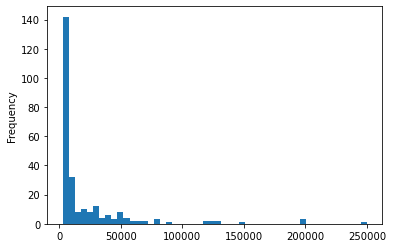

In [5]:
# 연봉 분포도 
data['2020연봉'].plot(kind = 'hist', bins = 50)

In [6]:
# 2020년에 입단한 신인 선수들의 대부분은 2700만원의 연봉을 받고 있음. 
# 2700이 아닌 선수들은 모두 외국인 선수들임
data[data.입단년도 == 2020]['2020연봉'].value_counts()

2700.0     22
30000.0     2
70000.0     1
80000.0     1
50000.0     1
20000.0     1
54000.0     1
10000.0     1
Name: 2020연봉, dtype: int64

# 3. 데이터 분석
 - 머신 러닝 알고리즘을 사용하지 않더라도 데이터 분석을 통해 유의미한 정보들을 얻을 수 있습니다. 

### 1) 타율이 가장 높은 선수 10명 찾기
 - 단, 50경기 이상 참여한 선수들만 대상으로 함

In [7]:
data[data['경기'] >= 50].sort_values(by = '타율', ascending = False)[:10]

,순위,선수명,팀명,타율,경기,타석,타수,득점,안타,2루타,...,삼진,병살타,장타율,출루율+장타율,OPS,멀티히트,득점권타율,대타타율,입단년도,2020연봉
134,2,최형우,KIA,0.354,140,600,522,93,185,37,...,101,9,0.590,0.433,1.023,55,0.374,1.000,2002.0,150000.0
25,3,손아섭,롯데,0.352,141,611,540,98,190,43,...,56,9,0.493,0.415,0.908,59,0.333,0.667,2007.0,200000.0
162,1,로하스,KT,0.349,142,628,550,116,192,39,...,132,11,0.680,0.417,1.097,58,0.351,0.000,2017.0,80000.0
207,3,박민우,NC,0.345,126,530,467,82,161,27,...,48,12,0.475,0.402,0.877,47,0.388,0.600,2012.0,52000.0
0,1,호세 페르난데스,두산,0.340,144,668,586,104,199,29,...,42,26,0.497,0.404,0.901,62,0.327,0.000,2019.0,40000.0
74,3,이정후,키움,0.333,140,617,544,85,181,49,...,47,16,0.524,0.397,0.921,52,0.354,0.500,2017.0,39000.0
1,2,허경민,두산,0.332,117,487,437,70,145,25,...,28,10,0.442,0.382,0.824,45,0.375,0.000,2009.0,48000.0
182,2,김현수,LG,0.331,142,619,547,98,181,35,...,53,9,0.523,0.397,0.920,51,0.446,0.000,2006.0,130000.0
163,2,강백호,KT,0.330,129,574,500,95,165,36,...,93,7,0.544,0.411,0.955,48,0.320,0.500,2018.0,21000.0
136,4,김선빈,KIA,0.330,85,351,303,42,100,19,...,43,12,0.403,0.406,0.809,22,0.345,0.200,2008.0,45000.0


### 2) 몸값을 가장 못한 선수(먹튀) 찾기
 - 연봉이 5억 이상인데, 타율이 0.25 이하인 타자 

In [8]:
data[(data['2020연봉'] >= 50000) & (data.타율 <= 0.25)]

,순위,선수명,팀명,타율,경기,타석,타수,득점,안타,2루타,...,삼진,병살타,장타율,출루율+장타율,OPS,멀티히트,득점권타율,대타타율,입단년도,2020연봉
37,15,민병헌,롯데,0.233,109,342,309,42,72,12,...,62,12,0.291,0.291,0.582,16,0.175,0.182,2006.0,125000.0
89,18,박병호,키움,0.223,93,383,309,56,69,7,...,114,8,0.450,0.352,0.802,16,0.227,0.000,2005.0,200000.0
118,23,김태균,한화,0.219,67,254,219,14,48,11,...,42,8,0.297,0.316,0.613,12,0.321,0.000,2001.0,50000.0
123,28,이성열,한화,0.203,79,248,227,23,46,5,...,69,4,0.330,0.270,0.600,8,0.194,0.368,2003.0,50000.0
124,29,제러드 호잉,한화,0.194,34,134,124,12,24,4,...,34,4,0.323,0.254,0.577,7,0.214,0.000,2018.0,55000.0
251,23,이재원,SK,0.185,80,251,222,18,41,8,...,24,12,0.248,0.266,0.514,7,0.237,0.333,2006.0,130000.0


## 주제 1.평균보다 연봉을 많이 받는 인원중에 평균 타율보다 낮고 평균 경기 참여 보다 작은 사람들 찾기

In [9]:
#data의 타율 평균
av_hittingRate = data['타율'].mean()
#data의 2020 평균 연봉
av_annaulIncome = data['2020연봉'].mean()
#data의 경기 참여 평균
av_participation = data['경기'].mean()
print(str(av_annaulIncome ) +'\n' + str (av_annaulIncome) + '\n' + str( av_participation))
#찾기
data[(data['2020연봉'] > av_participation) & ( data['경기'] < av_participation ) & (data['타율'] < av_hittingRate)].sort_values(by = '2020연봉', ascending = False)


20689.922480620156
20689.922480620156
71.45945945945945


,순위,선수명,팀명,타율,경기,타석,타수,득점,안타,2루타,...,삼진,병살타,장타율,출루율+장타율,OPS,멀티히트,득점권타율,대타타율,입단년도,2020연봉
124,29,제러드 호잉,한화,0.194,34,134,124,12,24,4,...,34,4,0.323,0.254,0.577,7,0.214,0.000,2018.0,55000.0
118,23,김태균,한화,0.219,67,254,219,14,48,11,...,42,8,0.297,0.316,0.613,12,0.321,0.000,2001.0,50000.0
242,14,한동민,SK,0.249,62,231,193,35,48,5,...,49,8,0.508,0.364,0.872,12,0.154,0.429,2012.0,25000.0
197,17,양석환,LG,0.246,40,132,118,8,29,5,...,25,1,0.364,0.315,0.679,7,0.313,1.000,2014.0,21000.0
95,24,테일러 모터,키움,0.114,10,37,35,4,4,0,...,10,0,0.200,0.135,0.335,0,0.091,0.000,2020.0,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,32,정기훈,한화,0.161,29,36,31,9,5,2,...,15,0,0.226,0.278,0.504,0,0.167,0.125,2020.0,2700.0
128,33,김지수,한화,0.160,14,26,25,2,4,0,...,7,0,0.280,0.192,0.472,0,0.400,0.500,2016.0,2700.0
198,18,김호은,LG,0.243,69,112,103,12,25,5,...,14,2,0.350,0.304,0.654,4,0.276,0.235,2020.0,2700.0
144,12,홍종표,KIA,0.250,40,88,80,7,20,3,...,13,1,0.288,0.282,0.570,4,0.115,0.000,2020.0,2700.0


## 주제2 .50경기 이상 인원중  뛴 각 팀별 에이스 찾기

In [10]:
#1.팀명 중복 제거 하기
teams = data.drop_duplicates('팀명', keep='first')['팀명'].values
#찾기
for i in teams :
    ace  = data[ (data['팀명'] ==  i)  & (data['경기'] >=50 ) ].sort_values(by = '타율', ascending = False)[0:1]
    print(ace[['팀명' ,'선수명' , '타율' , '경기']])
    

   팀명       선수명    타율   경기
0  두산  호세 페르난데스  0.34  144
    팀명  선수명     타율   경기
25  롯데  손아섭  0.352  141
    팀명  선수명     타율  경기
45  삼성  김호재  0.322  65
    팀명  선수명     타율   경기
74  키움  이정후  0.333  140
    팀명  선수명     타율   경기
99  한화  최재훈  0.301  126
      팀명  선수명     타율   경기
134  KIA  최형우  0.354  140
     팀명  선수명     타율   경기
162  KT  로하스  0.349  142
     팀명  선수명     타율   경기
182  LG  김현수  0.331  142
     팀명  선수명     타율   경기
207  NC  박민우  0.345  126
     팀명  선수명     타율  경기
229  SK  김경호  0.286  56


# 4. 연봉 예측 모델 구축을 위한 전처리

##  FA 2020 여부 & 외국인 선수 전처리 
 - 나무위키 2020 외국인 선수 , fa 참고했습니다.
 - 신입선수와 10경기 미만 인원들은 제외 했습니다.


In [64]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from pandas import Series, DataFrame
#data read
data = pd.read_excel('2020KBO야구.xlsx')
data_fa2020=pd.read_excel('fa2020.xlsx')
data_foreign = pd.read_excel('2020foreigner.xlsx')


#data refine
data_foreign = pd.read_excel('2020foreigner.xlsx')
data_fa2020.rename(columns={"구분":"FA구분" , "선수" : "선수명" , "비고" : "FA비고"}, inplace = True)
data_foreign.rename(columns={"이름" : "선수명"}, inplace = True)
#drop columns
data_fa2020.drop('팀', axis = 1, inplace = True)
data_fa2020.drop('나이[1]', axis = 1, inplace = True)
data_fa2020.drop('신청 여부', axis = 1, inplace = True)
data_fa2020.drop('계약 여부', axis = 1, inplace = True)
data_foreign.drop('비고' , axis = 1 , inplace = True)
data_foreign.drop('계약연봉' , axis = 1 , inplace = True)
data_foreign['내or외국인'] = '외국인'
#data  merge
data = pd.merge(data , data_fa2020 , how= 'left')
data = pd.merge(data , data_foreign , how = 'left')

#결측값 제거
data['내or외국인'] = data['내or외국인'].fillna('내국인')
data['인정년수'] = data['인정년수'].fillna('0')
data['FA비고'] = data['FA비고'].fillna('no')
data['FA구분'] = data['FA구분'].fillna('no')
#data refining
data = data[data['2020연봉'].notnull()]
# 선수명 삭제
data.drop('선수명', # 선수명이라는 인덱스를 삭제 
          axis = 1, # 삭제하고자 하는 인덱스는 컬럼 인덱스임
         inplace = True # 함수의 결과를 원본에 반영
         )

#10 경기보다 안 뛴 인원들을 제거 
idx = data[data['경기'] < 10].index
data.drop(idx , inplace = True)
#2019 , 2020연도 신입 야구선수들 제거
idx2 = data[data['입단년도'] >= 2019].index
data.drop(idx2 , inplace = True)
#label encoding 
data
le = LabelEncoder()
data['팀코드'] = le.fit_transform(data.팀명)
data['내or외국인'] = le.fit_transform(data.내or외국인)
data['인정년수'] =le.fit_transform(data.인정년수)
data['FA비고'] = le.fit_transform(data.FA비고)
data['FA구분'] = le.fit_transform(data.FA구분)
# 팀명 컬럼은 삭제
data.drop('팀명', axis = 1, inplace = True)
# 순위 정보도 무의미한 일련번호이므로 삭제
data.drop('순위', axis = 1, inplace = True)
data = data[data['2020연봉'].notnull()]


In [65]:
data

,타율,경기,타석,타수,득점,안타,2루타,3루타,홈런,루타,...,멀티히트,득점권타율,대타타율,입단년도,2020연봉,인정년수,FA구분,FA비고,내or외국인,팀코드
1,0.332,117,487,437,70,145,25,1,7,193,...,45,0.375,0.000,2009.0,48000.0,0,0,0,0,5
2,0.312,127,534,471,62,147,32,0,16,227,...,43,0.376,0.000,2005.0,47000.0,0,0,0,0,5
3,0.306,140,574,509,63,156,29,4,16,241,...,41,0.349,0.750,2006.0,27000.0,0,0,0,0,5
4,0.304,129,551,487,103,148,40,0,14,230,...,43,0.280,0.500,2009.0,45000.0,0,0,0,0,5
5,0.298,141,559,490,84,146,17,8,5,194,...,39,0.265,1.000,2009.0,34000.0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.197,35,72,66,3,13,1,0,1,17,...,1,0.364,0.200,2009.0,3000.0,0,0,0,0,4
253,0.192,34,76,73,4,14,2,0,3,25,...,4,0.211,0.154,2004.0,18000.0,0,0,0,0,4
254,0.185,80,251,222,18,41,8,0,2,55,...,7,0.237,0.333,2006.0,130000.0,0,0,0,0,4
255,0.178,58,109,101,7,18,2,0,2,26,...,3,0.091,0.000,2015.0,3000.0,0,0,0,0,4


# 6. 연봉 예측 모델 구축 

###  1.아웃라이어의 영향을 최소로 받기 위해 , RobustScaler로 정규화하기 
- 연봉분포를 통해보니 고연봉 인원들의 영향을 최소화 하기 위해  RobustScaler를 사용했습니다

In [102]:
#1 데이터를 RobustScaler로 정규화하기¶
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

scaler = RobustScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)
data_scaled = pd.DataFrame (data = data_scaled, columns = data.columns)
feature = data_scaled.drop('2020연봉', axis = 1)
target = data_scaled['2020연봉']
X_train, X_test, y_train, y_test = train_test_split(feature, target, random_state = 100)


###  여러모델로 학습해보고 최적의 모델 찾기(lgbm , catboost ,xgboost ,randomforest)

- Lgbm Regressor Mse: 0.6023899197355846
- CatBoost Regressor Mse: 0.442303165114358
- XgbBoost Regressor Mse: 0.44034391840126197
- RandomForest Regressor Mse:  0.3981422935770425 [best model]

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [103]:
'''
#using lgbm regressor Mse : 0.6023899197355846
import lightgbm as lgb
lightgbm = lgb.LGBMRegressor(random_state = 100)
params = {'bootstrap': [True],
            'max_depth':[5,6 ,7 ],
            'n_estimators': [170 , 172 , 175],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split':[2, 3]}
grid_lgbm = GridSearchCV(lightgbm, params, cv = 5, scoring ='neg_mean_absolute_error' ,refit = True)
grid_lgbm.fit(X_train , y_train)
print(grid_lgbm.best_score_)
print(grid_lgbm.best_params_)
'''

"\n#using lgbm regressor Mse : 0.6023899197355846\nimport lightgbm as lgb\nlightgbm = lgb.LGBMRegressor(random_state = 100)\nparams = {'bootstrap': [True],\n            'max_depth':[5,6 ,7 ],\n            'n_estimators': [170 , 172 , 175],\n            'min_samples_leaf': [1, 2, 4],\n            'min_samples_split':[2, 3]}\ngrid_lgbm = GridSearchCV(lightgbm, params, cv = 5, scoring ='neg_mean_absolute_error' ,refit = True)\ngrid_lgbm.fit(X_train , y_train)\nprint(grid_lgbm.best_score_)\nprint(grid_lgbm.best_params_)\n"

In [104]:
'''
#using catboost regressor, Mse: 0.442303165114358
from catboost import CatBoostRegressor
catboost = CatBoostRegressor()
params = {  'max_depth':[5,6 ,7 ],
            'n_estimators': [150 , 160 , 170],
            }
grid_cbt = GridSearchCV(catboost, params, cv = 5, scoring ='neg_mean_absolute_error' ,refit = True)
grid_cbt.fit(X_train , y_train)
print(grid_cbt.best_score_)
print(grid_cbt.best_params_)
'''


"\n#using catboost regressor, Mse: 0.442303165114358\nfrom catboost import CatBoostRegressor\ncatboost = CatBoostRegressor()\nparams = {  'max_depth':[5,6 ,7 ],\n            'n_estimators': [150 , 160 , 170],\n            }\ngrid_cbt = GridSearchCV(catboost, params, cv = 5, scoring ='neg_mean_absolute_error' ,refit = True)\ngrid_cbt.fit(X_train , y_train)\nprint(grid_cbt.best_score_)\nprint(grid_cbt.best_params_)\n"

In [105]:
#using XboostRegressor  , Mse  ; 0.44034391840126197
'''
from xgboost import XGBRegressor
xgb1 = XGBRegressor()
parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)
xgb_grid.fit(X_train, y_train)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
'''

"\nfrom xgboost import XGBRegressor\nxgb1 = XGBRegressor()\nparameters = {'nthread':[4], \n              'objective':['reg:linear'],\n              'learning_rate': [.03, 0.05, .07],\n              'max_depth': [5, 6, 7],\n              'min_child_weight': [4],\n              'silent': [1],\n              'subsample': [0.7],\n              'colsample_bytree': [0.7],\n              'n_estimators': [500]}\nxgb_grid = GridSearchCV(xgb1,\n                        parameters,\n                        cv = 2,\n                        n_jobs = 5,\n                        verbose=True)\nxgb_grid.fit(X_train, y_train)\nprint(xgb_grid.best_score_)\nprint(xgb_grid.best_params_)\n"

In [96]:
from sklearn.ensemble import RandomForestRegressor 
#Using RandomForestRegressor Mse : 0.3981422935770425
rf = RandomForestRegressor()
rf_params = {'bootstrap': [True],
            'max_depth':[5,6 ,7 ],
            'n_estimators': [170 , 172 , 175],
            'min_samples_leaf': [2, 3, 4],
            'min_samples_split':[2, 3]}
grid_rf2 = GridSearchCV(rf, rf_params, cv = 5, scoring ='neg_mean_absolute_error' ,refit = True)
grid_rf2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 6, 7],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3],
                         'n_estimators': [170, 172, 175]},
             scoring='neg_mean_absolute_error')

###  3.mse로 지표 평가하기

In [97]:
mean_absolute_error(y_test, grid_rf2.predict(X_test))

0.3981422935770425

# 7. 연봉 예측 모델 검증


In [98]:
# 어떤 컬럼이 연봉에 많은 영향을 미치는지 확인
특성중요도 = DataFrame({'col': X_train.columns,
           'importance':grid_rf2.best_estimator_.feature_importances_})
특성중요도.sort_values(by = 'importance', ascending = False)

,col,importance
8,홈런,0.214111
24,입단년도,0.181067
14,고의사구,0.179644
10,타점,0.093776
9,루타,0.087381
12,희생플라이,0.056968
17,병살타,0.034443
2,타석,0.033303
13,볼넷,0.026778
16,삼진,0.015242


In [99]:
# 실제 연봉과 예측값과의 비교
연봉예측 = DataFrame({'실제연봉': y_test,
          '예측값': grid_rf2.predict(X_test)})
연봉예측 = 연봉예측.reset_index().drop('index', axis = 1)

In [100]:
import matplotlib as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # 그래프 그릴 때 한글깨짐 방지를 위하여 폰트 변경

<AxesSubplot:>

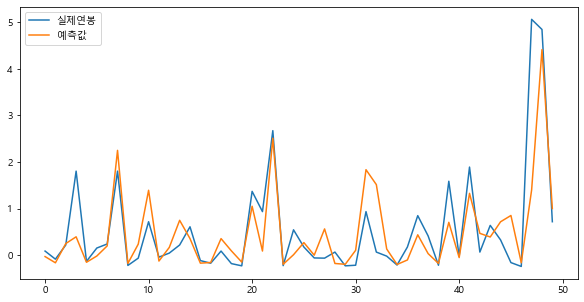

In [101]:
연봉예측.plot(figsize = (10,5))